In [9]:
!pip install konlpy

  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c4/4b/60a3e63d51714d4d7ef1b1efdf84315d118a0a80a5b085bb52a7e2428cdc/JPype1-0.6.3.tar.gz
  Stored in directory: C:\Users\A\AppData\Local\pip\Cache\wheels\0e\2b\e8\c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [10]:
from konlpy.tag import Okt

In [11]:
okt = Okt()

In [12]:
okt.pos('아버지가방에들어가신다.')

[('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [13]:
from konlpy.tag import Kkma
kk = Kkma()

In [14]:
kk.pos('아버지가방에들어가신다.')

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [19]:
okt.pos('하늘을 나는 자동차')

[('하늘', 'Noun'), ('을', 'Josa'), ('나', 'Noun'), ('는', 'Josa'), ('자동차', 'Noun')]

In [20]:
kk.pos('하늘을 나는 자동차')

[('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]

In [21]:
okt.pos('나는 밥을 먹는다.')

[('나', 'Noun'),
 ('는', 'Josa'),
 ('밥', 'Noun'),
 ('을', 'Josa'),
 ('먹는다', 'Verb'),
 ('.', 'Punctuation')]

In [22]:
kk.pos('나는 밥을 먹는다.')

[('나', 'NP'),
 ('는', 'JX'),
 ('밥', 'NNG'),
 ('을', 'JKO'),
 ('먹', 'VV'),
 ('는', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF')]

In [23]:
# https://raw.githubusercontent.com/kimyoungjin06/korea_modern_literature/master/400_korea_modern_poetry.txt

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [26]:
f = open('./poetry.txt', "r", encoding='utf-8')
data = []
for line in f :
    data.append(line.replace('\n',''))
f.close()
len(data)

19378

In [27]:
data[:10]

['1. 전환기의 좌절과 희망',
 '',
 '',
 '',
 '1.\u3000최남선(崔南善)   - 해(海)에게서 소년(少年)에게',
 '2.\u3000최남선           - 꽃 두고',
 '3.\u3000이광수(李光洙)   - 비둘기',
 '4.\u3000주요한(朱耀翰)   - 샘물이 혼자서',
 '5.\u3000주요한           - 불놀이',
 '6.\u3000주요한           - 빗소리']

In [30]:
import re
f = open('./poetry.txt', "r", encoding='utf-8')
data = []
for line in f :
    temp = re.sub('[^가-힣0-9a-zA-Z.,]',' ',line)# 패턴에 해당 하는 걸 다 바꾸는 과정
    while(temp.find('  ') > -1):
        temp = temp.replace('  ',' ')#여러칸 띄어쓰기를 한칸으로 바꾸는 반복문
    data.append(temp)
f.close()
len(data)

19378

In [31]:
phr = ' '.join(data)

In [32]:
tag = okt.pos(phr)

In [33]:
from collections import Counter

In [34]:
cnt = Counter(tag).most_common(len(tag))

In [40]:
cnt[:20]

[(('.', 'Punctuation'), 3322),
 ((',', 'Punctuation'), 1682),
 (('을', 'Josa'), 1563),
 (('에', 'Josa'), 1430),
 (('의', 'Josa'), 1377),
 (('이', 'Josa'), 1068),
 (('는', 'Josa'), 772),
 (('은', 'Josa'), 693),
 (('를', 'Josa'), 574),
 (('나', 'Noun'), 563),
 (('가', 'Josa'), 500),
 (('도', 'Josa'), 462),
 (('들', 'Suffix'), 387),
 (('그', 'Noun'), 358),
 (('것', 'Noun'), 339),
 (('이', 'Noun'), 331),
 (('내', 'Noun'), 327),
 (('에서', 'Josa'), 270),
 (('한', 'Verb'), 265),
 (('과', 'Josa'), 255)]

In [35]:
a,b = zip(*cnt)

In [36]:
import matplotlib.pyplot as plt
import numpy as np

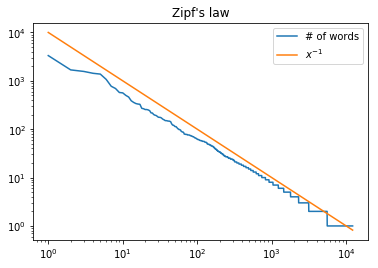

In [37]:
plt.title('Zipf\'s law')#많은 종류의 정보들이 지프 분포에 가까운 경향을 보인다는 것
x = np.arange(1,len(b)+1)
plt.plot(x, b, label = '# of words')
plt.plot(x, 10000*x**(-1.), label = '$x^{-1}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [41]:
#### 처리2

In [42]:
import re
f = open('./poetry.txt', "r", encoding='utf-8')
data = []
for line in f :
    temp = re.sub('[^가-힣0-9a-zA-Z.,]',' ',line)# 패턴에 해당 하는 걸 다 바꾸는 과정
    while(temp.find('  ') > -1):
        temp = temp.replace('  ',' ')#여러칸 띄어쓰기를 한칸으로 바꾸는 반복문
    data.append(temp)
f.close()
len(data)

19378

In [43]:
from konlpy.tag import Okt
import re

In [44]:
okt = Okt()

In [45]:
data[:10]

['1. 전환기의 좌절과 희망 ',
 ' ',
 ' ',
 ' ',
 '1. 최남선 해 에게서 소년 에게 ',
 '2. 최남선 꽃 두고 ',
 '3. 이광수 비둘기 ',
 '4. 주요한 샘물이 혼자서 ',
 '5. 주요한 불놀이 ',
 '6. 주요한 빗소리 ']

In [46]:
from collections import Counter

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
A = set([1,2,3])
B = set([3,4,5])

In [49]:
word_set = set()
word_cnt = []
for line in data:# 각 줄을 띄어쓰기로 나누고 집합화
    word_set = word_set | set(line.split(' '))# | 또는=합집합
    word_cnt.append(len(word_set))
len(word_cnt)

19378

In [50]:
len(word_set)#단어 수

17863

In [51]:
y1 = word_cnt[:]

In [52]:
word_set = set()
word_cnt = []
for line in data:# 각 줄을 분석기로 나누고 집합화
    word_set = word_set | set(okt.pos(line))
    word_cnt.append(len(word_set))
len(word_cnt)

19378

In [53]:
len(word_set)

12197

In [54]:
y2 = word_cnt[:]

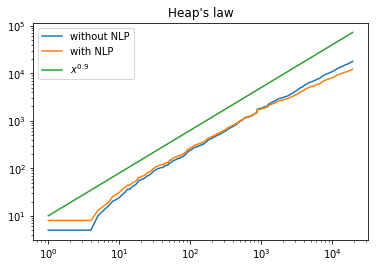

In [57]:
x = np.arange(1,len(word_cnt)+1)
plt.title('Heap\'s law')#힙스 로우 : 문서의 길이가 길어질 때, 등장하는 단어의 종류의 분포. 무리함수 형태 따름
plt.plot(x,y1, label = 'without NLP')
plt.plot(x,y2, label = 'with NLP')
plt.plot(x,10*x**.9, label = '$x^{0.9}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()#문서가 짧아서 매우 흡사하진 않은듯.

In [58]:
#### word 2 vec

In [59]:
!pip install -U gensim

  Stored in directory: C:\Users\A\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Stored in directory: C:\Users\A\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [60]:
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import re

okt = Okt()

# '나는' > [(나,Noun), (는,Josa)] > [나/Noun, 는/Josa]
def tokenize(phr):#토큰화 되어 있어야 워트 2 벡 사용 가능
    return ['/'.join(x) for x in okt.pos(phr, norm = True, stem = True)]

In [61]:
f = open('./108_korea_modern_novel_I.txt', 'r', encoding='utf-8')

data = []
for line in f:
    temp = re.sub('[^가-힣0-9a-zA-Z.,]', ' ', line)
    while temp.find('  ') > -1:
        temp = temp.replace('  ', " ")
    temp = tokenize(temp)
    data.append(temp)
f.close()

In [63]:
f = open('./108_korea_modern_novel_II.txt', 'r', encoding='utf-8')

for line in f:
    temp = re.sub('[^가-힣0-9a-zA-Z.,]', ' ', line)
    while temp.find('  ') > -1:
        temp = temp.replace('  ', " ")
    temp = tokenize(temp)
    data.append(temp)
f.close()

In [64]:
len(data)

15524

In [65]:
model = Word2Vec(data,#corpus file: 참고 파일
                size = 50,#학습할 차원(히든 노드)
                min_count = 2,#최소 등장 횟수
                sg = 1)#한번에 학습

In [66]:
# model = Word2Vec(
#                 size = 50,
#                 min_count = 2,
#                 sg = 1)
# model.build_vocab(data)
# model.train(data)
# model.init_sims(replace=True) #다른 데이터를 활용 하고 싶을 때

In [67]:
w = tokenize('사랑 소년')
w

['사랑/Noun', '소년/Noun']

In [68]:
w = tokenize('소년 여자')
w2 = tokenize('남자')
model.wv.most_similar(positive=w,negative=w2)#positive : 닮은 단어, negative : 뺄 단어 /  여러 단어 해봐도 학습이 잘 되진 않는듯

[('독고준/Noun', 0.8386066555976868),
 ('명숙/Noun', 0.8286534547805786),
 ('풍경/Noun', 0.8231366872787476),
 ('선달/Noun', 0.8177834749221802),
 ('현/Noun', 0.8102849125862122),
 ('움직임/Noun', 0.8101515769958496),
 ('화폭/Noun', 0.8097796440124512),
 ('불길/Noun', 0.8092167377471924),
 ('여선생/Noun', 0.8072596192359924),
 ('주임/Noun', 0.8071957230567932)]

In [69]:
model.wv[tokenize('소년')]#학습 size 각 노드의 값

array([[ 0.53381705,  0.16133064, -0.04049385, -0.05182935, -0.00249891,
        -0.05737005,  0.39403442, -0.2413133 , -0.11529216, -0.03285623,
        -0.25645095, -0.03780453, -0.10508744, -0.17042273,  0.01846344,
        -0.28927866, -0.26979566,  0.25352973,  0.06453611, -0.27098343,
        -0.27214476, -0.08913857,  0.2154563 , -0.09157246, -0.08842127,
         0.41592887,  0.15971212,  0.31173262, -0.04031059,  0.4450487 ,
        -0.15820637, -0.005063  ,  0.31036627,  0.4246616 ,  0.30453166,
         0.32633403,  0.12270286,  0.11323898, -0.21283972,  0.25852183,
         0.9603756 ,  0.07408746, -0.36756393, -0.04770661,  0.22048171,
         0.10345646, -0.29820135, -0.7819863 , -0.6378895 , -0.41725302]],
      dtype=float32)

In [ ]:
model_movie = Word2Vec.load("./movie_review_word2vec.model")#깃허브 박은정 e9t/nsmc

In [ ]:
model_movie.wv.most_similar(positive = tokenize('송강호'))

In [1]:
#### Cohesion score

In [2]:
!pip install soynlp

In [29]:
from soynlp.word import WordExtractor
from gensim.models.word2vec import Word2Vec
import re
import numpy as np
import matplotlib.pyplot as plt

In [30]:
word_extractor = WordExtractor()

In [35]:
f = open('./ratings_train.txt', 'r', encoding='utf-8')
data = []
for line in f:
    data.append(line.replace('\n','').split('\t')[1])#[1] : np.array 할 땐 지우기 / 워드 익스트렉터 할 땐 쓰기
f.close()
len(data)

150001

In [32]:
temp = np.array(data[1:])
comment = temp[:,1]
comment[:10]

array(['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
       '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
       '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
       '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
       '원작의 긴장감을 제대로 살려내지못했다.',
       '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
       '액션이 없는데도 재미 있는 몇안되는 영화',
       '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?'], dtype='<U158')

In [36]:
text = data[1:100000]

In [27]:
?WordExtractor

In [37]:
word_extractor.train(data[1:100000])#에러 발생

training was done. used memory 0.952 Gbory 0.923 Gb


In [38]:
words = word_extractor.extract()

all cohesion probabilities was computed. # words = 61026
all branching entropies was computed # words = 73401
all accessor variety was computed # words = 73401


In [39]:
len(words.keys())

42093

In [40]:
words.keys()#단어 목록

dict_keys(['롱', '륵', '춘', '럭', ']', '덮', '팀', '대', '뻣', '갈', '륙', '뺏', '니', '쟈', '힝', '밧', '다', '석', '츤', '향', '웬', '풋', '궈', '샌', '춤', '덥', '발', '핫', '획', '앳', '꺽', '윈', '센', '룡', '_', '절', '삘', '밖', '메', '읎', '산', '점', '콕', '쪙', '괜', '퉁', '잘', '낫', '쫒', '봉', '깔', '콰', '칭', '뇌', '찝', '별', '람', '뱃', '즐', '뚱', 'M', '욱', '해', 'b', '닌', 'R', '껍', '떡', '틈', '헝', '졸', '률', '극', '폴', '쩍', '밀', '쵝', '삶', '맹', '갚', '밋', '와', '쇼', '듭', '훑', '둥', '랭', '떠', '벙', '혀', '찢', '닉', '캐', '훤', '능', '값', 'T', '칼', '등', '였', '봐', '육', 'k', '펠', '붉', '(', '을', '욘', '완', '웃', '흘', '팡', '픔', '서', '사', '워', '앵', '방', '렉', '및', '쫄', '독', '짜', '혹', '뒤', '촘', '먼', '까', '끄', '곽', 'm', 'H', '양', '9', '굿', '찜', '★', '규', '칙', '펴', '저', '린', '랴', '엎', '둔', '흰', '땡', '죄', '꺄', '[', '께', '면', '밝', '쒸', 's', '1', '음', '년', '횟', '간', '츄', '뛴', '히', 'ㅡ', '꽃', '웅', '헉', '팰', '숫', '촛', '헛', '꾼', '땜', '욤', '온', '덕', '턴', '즈', 'a', '괸', '권', '뮬', '톰', '섭', '푸', '취', '껏', '탁', '멋', '망', '구', '키', '좇', '썼', '럽', '쑥', '^', '좀',

In [41]:
res01 = [(wd, words[wd][0], words[wd][2]) for wd in words.keys()]#코헨션과 엔트로피만 가져오기

In [42]:
sorted(res01, key = lambda x:x[1], reverse=True)#엔트로피 값 높은게 뜻있는 단어일 가능성 높음

[('낄낄', 1.0, -0.0),
 ('쨋든', 1.0, 0),
 ('셜록', 1.0, -0.0),
 ('꿋꿋', 1.0, -0.0),
 ('뙇!', 1.0, -0.0),
 ('핰핰', 1.0, 0),
 ('릿카', 1.0, 0),
 ('깬다', 1.0, 0),
 ('굉장', 1.0, 2.9848595167281844),
 ('짊어', 1.0, -0.0),
 ('룻거', 1.0, 0),
 ('헷갈', 1.0, 1.9269145052641097),
 ('깁슨', 1.0, -0.0),
 ('뻣뻣', 1.0, 0),
 ('늑대', 1.0, 1.874063207697293),
 ('줏대', 1.0, -0.0),
 ('쥔공', 1.0, 0),
 ('잖아', 1.0, 0.9272771162838269),
 ('걱정', 1.0, 2.5095889806860976),
 ('촘촘', 1.0, -0.0),
 ('휼륭', 1.0, 0.6931471805599453),
 ('칙칙', 1.0, 0.6931471805599453),
 ('듭니', 1.0, 0.6310051928046935),
 ('큽니다', 1.0, 0.6931471805599453),
 ('뭡니까', 1.0, 1.0579054247036734),
 ('빕니다', 1.0, -0.0),
 ('"""', 1.0, 2.3336873037032366),
 ('홉킨스', 1.0, -0.0),
 ('탭댄스', 1.0, -0.0),
 ('룬드그', 1.0, -0.0),
 ('듭니다', 0.9893045053244826, 0.6187191250308035),
 ('ㅉㅉ', 0.9868995633187773, 3.047684302492402),
 ('촬영', 0.9857142857142858, 2.8773336303136294),
 ('됩니', 0.9850746268656716, 1.897186450115756),
 ('쵝오', 0.9777777777777777, 2.7924123100342046),
 ('액션', 0.9757462

In [43]:
score = dict()#단어별 코헨션 값 딕셔너리
for a, b, c in res01:
    score[a] = b

In [44]:
score

{'롱': 0,
 '륵': 0,
 '춘': 0,
 '럭': 0,
 ']': 0,
 '덮': 0,
 '팀': 0,
 '대': 0,
 '뻣': 0,
 '갈': 0,
 '륙': 0,
 '뺏': 0,
 '니': 0,
 '쟈': 0,
 '힝': 0,
 '밧': 0,
 '다': 0,
 '석': 0,
 '츤': 0,
 '향': 0,
 '웬': 0,
 '풋': 0,
 '궈': 0,
 '샌': 0,
 '춤': 0,
 '덥': 0,
 '발': 0,
 '핫': 0,
 '획': 0,
 '앳': 0,
 '꺽': 0,
 '윈': 0,
 '센': 0,
 '룡': 0,
 '_': 0,
 '절': 0,
 '삘': 0,
 '밖': 0,
 '메': 0,
 '읎': 0,
 '산': 0,
 '점': 0,
 '콕': 0,
 '쪙': 0,
 '괜': 0,
 '퉁': 0,
 '잘': 0,
 '낫': 0,
 '쫒': 0,
 '봉': 0,
 '깔': 0,
 '콰': 0,
 '칭': 0,
 '뇌': 0,
 '찝': 0,
 '별': 0,
 '람': 0,
 '뱃': 0,
 '즐': 0,
 '뚱': 0,
 'M': 0,
 '욱': 0,
 '해': 0,
 'b': 0,
 '닌': 0,
 'R': 0,
 '껍': 0,
 '떡': 0,
 '틈': 0,
 '헝': 0,
 '졸': 0,
 '률': 0,
 '극': 0,
 '폴': 0,
 '쩍': 0,
 '밀': 0,
 '쵝': 0,
 '삶': 0,
 '맹': 0,
 '갚': 0,
 '밋': 0,
 '와': 0,
 '쇼': 0,
 '듭': 0,
 '훑': 0,
 '둥': 0,
 '랭': 0,
 '떠': 0,
 '벙': 0,
 '혀': 0,
 '찢': 0,
 '닉': 0,
 '캐': 0,
 '훤': 0,
 '능': 0,
 '값': 0,
 'T': 0,
 '칼': 0,
 '등': 0,
 '였': 0,
 '봐': 0,
 '육': 0,
 'k': 0,
 '펠': 0,
 '붉': 0,
 '(': 0,
 '을': 0,
 '욘': 0,
 '완': 0,
 '웃': 0,
 '흘': 0,
 

In [45]:
from soynlp.tokenizer import LTokenizer

In [46]:
tokenizer = LTokenizer(score)

In [47]:
data[2]

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나'

In [48]:
res02 = [tokenizer.tokenize(x) for x in data[100000:]]

In [49]:
data[100000:100010]

['말이 필요없는영화... 20대때 한번으로 이해가 부족했던...그래서 다시볼때 더 좋았던영화...',
 '할말이 없다.. 무엇을 말하려고 하는지 도저히 알수가 없네요',
 '이준 빠순이들 총출동이구나 이래서 아이돌은 노래만 해야함 요즘영화계가점점 썩어가네 엄청난 배우들 또는 연기잘하는 배우지망생들도잇는데 빠순이들 공략할려고 아이돌만 출연시키고 스토리는이게또뭐여...',
 '감독은 관객을 상대로 게임을 하는것이다',
 '제목을 보고 어떤 영화일까 궁금해서 봤는데 생각보다 캐릭터 하나하나들을 잘 만들어 내어서 재밌게 봤다. 전도한 감독 기억해 놓겠음.',
 '긴장감 있는 추리',
 '내용이 뭐가 막장이냐 저런 집도 찾아보면 많다~',
 '싸구려도 이만하면 중박은 치지 않았는가',
 '세상엔 이렇게 아름다운 영화도 존재하는군요',
 '동안의 매튜 브로데릭, 미쉘파이퍼의 신비로움만 기억에 가득']

In [50]:
res02[:10]#띄어 쓰기 잘 되 있으면 잘 됨

[['말이',
  '필요',
  '없는영화...',
  '20',
  '대때',
  '한번',
  '으로',
  '이해가',
  '부족',
  '했던...그래서',
  '다시',
  '볼때',
  '더',
  '좋았',
  '던영화...'],
 ['할말이', '없다.', '.', '무엇을', '말하려고', '하는', '지', '도저히', '알수가', '없네요'],
 ['이준',
  '빠순이들',
  '총출동이구나',
  '이래서',
  '아이',
  '돌은',
  '노래',
  '만',
  '해야',
  '함',
  '요즘',
  '영화계가점점',
  '썩어',
  '가네',
  '엄청',
  '난',
  '배우',
  '들',
  '또는',
  '연기',
  '잘하는',
  '배우',
  '지망생들도잇는데',
  '빠순이들',
  '공략할려고',
  '아이',
  '돌만',
  '출연',
  '시키고',
  '스토리',
  '는이게또뭐여...'],
 ['감독', '은', '관객', '을', '상대로', '게임', '을', '하는', '것이다'],
 ['제목',
  '을',
  '보고',
  '어떤',
  '영화',
  '일까',
  '궁금',
  '해서',
  '봤는데',
  '생각',
  '보다',
  '캐릭터',
  '하나하나',
  '들을',
  '잘',
  '만들',
  '어',
  '내어',
  '서',
  '재밌',
  '게',
  '봤다.',
  '전도',
  '한',
  '감독',
  '기억',
  '해',
  '놓겠음.'],
 ['긴장', '감', '있는', '추리'],
 ['내용', '이', '뭐가', '막장', '이냐', '저런', '집도', '찾아', '보면', '많다', '~'],
 ['싸구려', '도', '이만하면', '중박은', '치지', '않았', '는가'],
 ['세상', '엔', '이렇게', '아름다운', '영화', '도', '존재하는', '군요'],
 ['동안', '의', '매튜', '브로', '데릭,', '미쉘', '파이퍼

In [51]:
model = Word2Vec(res02)

In [54]:
model.wv.most_similar(positive='긴장')

[('감도', 0.9749107956886292),
 ('감', 0.9568871259689331),
 ('잇고', 0.9553122520446777),
 ('스릴', 0.9498212337493896),
 ('몰입', 0.9467235207557678),
 ('이상하고', 0.9353010654449463),
 ('없고', 0.9300960302352905),
 ('어정쩡', 0.9278194904327393),
 ('있고', 0.9267923831939697),
 ('주제도', 0.924036979675293)]